In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("data")

In [5]:
df.head()

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z,Temp
0,308.00354,308.003479,1,-0.620,-1.32,1.48,308.009094
1,308.00354,308.003479,1,-0.930,-0.92,1.48,308.009094
2,308.00354,308.003479,1,-0.300,-1.55,1.72,308.009094
3,308.00354,308.003479,1,-0.001,-0.70,1.39,308.008850
4,308.00354,308.003479,1,-0.720,-0.76,1.25,308.009064


In [6]:
corrmat = df.corr()

In [7]:
top_corr_features=corrmat.index

<AxesSubplot:>

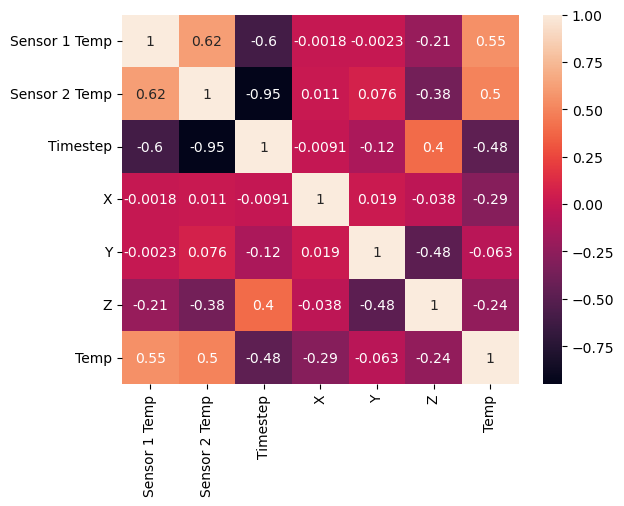

In [8]:
sns.heatmap(df[top_corr_features].corr(),annot=True)

In [9]:
#Dividing into feature and target
features = ['Sensor 1 Temp', 'Sensor 2 Temp', 'Timestep', 'X', 'Y', 'Z']
y = df['Temp']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [11]:
x = df[features]

In [12]:
x

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z
0,308.003540,308.003479,1,-0.620,-1.32,1.48
1,308.003540,308.003479,1,-0.930,-0.92,1.48
2,308.003540,308.003479,1,-0.300,-1.55,1.72
3,308.003540,308.003479,1,-0.001,-0.70,1.39
4,308.003540,308.003479,1,-0.720,-0.76,1.25
...,...,...,...,...,...,...
189373,285.617218,289.185272,6720,-0.730,-3.35,1.31
189374,285.617218,289.185272,6720,-0.620,-4.23,1.87
189375,285.617218,289.185272,6720,-1.100,-4.17,1.79
189376,285.617218,289.185272,6720,-1.300,-3.80,1.58


In [13]:
y

0         308.009094
1         308.009094
2         308.009094
3         308.008850
4         308.009064
             ...    
189373    285.797241
189374    290.172668
189375    289.185272
189376    289.218384
189377    282.999908
Name: Temp, Length: 189378, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [15]:
x_test

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z
95048,285.617218,298.242493,2427,0.10,-0.75,1.78
174988,285.617218,289.352264,5921,-0.92,-3.60,1.55
123330,285.617218,292.713043,3474,-0.62,0.55,0.80
92099,285.617218,299.059204,2318,-0.30,-1.55,1.72
33178,291.531769,310.447479,738,-0.73,-3.35,1.31
...,...,...,...,...,...,...
103376,285.617218,296.189819,2735,-0.62,0.08,0.56
91404,285.617218,299.260986,2292,-0.62,-3.90,1.48
112673,285.617218,294.327362,3080,-0.30,-1.55,1.72
35007,290.789429,310.354584,778,-1.20,-3.10,0.15


In [16]:
from xgboost import XGBRegressor

In [17]:
xgmodel = XGBRegressor()

In [18]:
xgmodel.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
pred = xgmodel.predict(x_test)

In [20]:
mean_absolute_error(y_test,pred)

0.11968277703243814

In [21]:
np.min(np.array(y))

282.9998474

###Predicting on Random Data

In [22]:
random_data = pd.read_csv('test.csv')

In [23]:
random_data.head()

,Sensor 1 Temp,Sensor 2 Temp,Timestep,X,Y,Z
0,298.374,298.86,1,1.134,-4.1148,0.043414
1,298.374,298.86,1,1.134,-4.1148,0.018943
2,298.374,298.86,1,1.134,-4.1148,0.074432
3,298.374,298.86,1,1.134,-4.1148,0.089921
4,298.374,298.86,1,1.134,-4.1148,0.101410


In [24]:
len(random_data)

16384

In [25]:
temp_pred = xgmodel.predict(random_data)

In [26]:
random_data['Temp'] = temp_pred

###### random_data

In [28]:
random_data.to_csv('random_pred.csv')

In [29]:
temp_pred

array([301.8333 , 301.84216, 301.82837, ..., 299.34262, 299.34262,
       299.34262], dtype=float32)

In [30]:
import matplotlib.pyplot as plt
# plt.imshow(y)

In [31]:
x1 = random_data['Y']
x2 = random_data['Z']

In [32]:
f = random_data['Temp']

In [33]:
f = np.array(f,dtype=float)

In [34]:
f.shape

(16384,)

In [35]:
f=f.reshape(128,128)

In [36]:
f.shape

(128, 128)

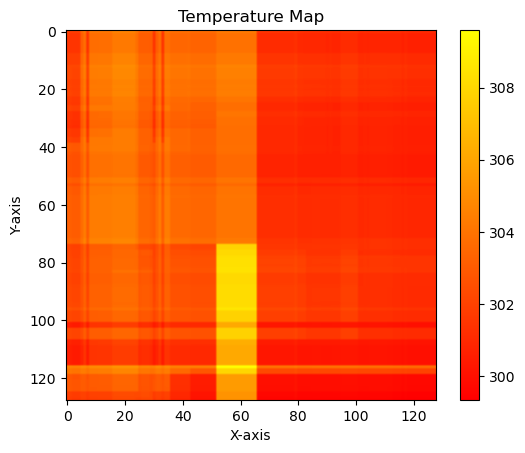

In [37]:

# Create a color map
cmap = plt.get_cmap('autumn')

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the temperature data with the color map
im = ax.imshow(f, cmap=cmap)

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set the title
ax.set_title('Temperature Map')

# Show the plot
plt.show()